#  <center> Xgboost와 GridsearchCv 활용한 유전체 품종 분류 분석에 대한 연구 </center> 

## <center> 이하준 </center>



### <center> 서울시립대</center>
#### <center> hahava789@gmail.com </center>


## <center> 초록 </center>

   단일 염기 다형성(single nucleotide Polymorphisms), 일명 SNP는 하나의 염기서열의 차이, 변이를 뜻한다. SNP는 다양한 유전적 변이성에 대한 정보를 제공하기 때문에 품종 개량, 구분 등에 널리 활용되고 있으며 본 연구에서는 개체 정보, SNP 정보를 통해 A, B, C 품종을 분류하는 것을 목적으로 하였다. 이를 위해 기계학습의 일종인 Xgboost 모델을 활용하였으며, 모델 성능의 향상을 위해 하이퍼 파라미터 튜닝 모델의 일종인 GridSearchCv를 활용해 최적의 파라미터를 선정하였다. 데이터는 261개의 훈련 데이터 셋과 15개 SNP의 정보 데이터 셋으로 이루어져 있으며 174개의 테스트 데이터로 모델의 성능을 확인하였다. 연구에서는 SNP정보 데이터 셋에서 염색체에 대한 정보를 활용하기 위해 염색체 별로 그룹을 묶어 최종적으로 성능이 가장 좋은 모델을 선정하였다. 본 연구를 통해 SNP를 활용한 품종 분류에 대해 머신러닝 기반의 모델 적용 가능성과 더불어 염색체 활용에 대해서도 살펴볼 수 있었다.
 

# 1. 서론

최근 생물학의 발전으로 DNA를 활용한 분자표지인지 시스템이 개발되고 있다. 그로 인해 STR(Short Tandem repeat), RFLP(restriction fragment length polymorphism) 등이 활용되었으나 최근은 이러한 시간과 장비를 많이 소요되는 기술보다 SNP(single nucleotide Polymorphisms)같은 분자표지 탐지 기술이 이용되고 있다. 

본 연구에서도 이러한 SNP를 활용해 A, B, C 품종의 정확한 분류를 하는 것을 목적으로 하고 있다. 데이터는 훈련 데이터, SNP정보 데이터, 테스트 데이터로 이루어져있므며 훈련 데이터와 SNP정보 데이터를 통해 품종 정보가 제공되지 않는 테스트 데이터의 정확도를 최대로 끌어올리는 것을 목표로 하였다. 이를 위해 SNP정보 데이터를 최대한 활용할 필요가 있었으며 정보 데이터 세트에 chrom(염색체)에 대한 정보가 존재한다는 것에 착안해 전체 SNP정보를 활용하기 보다는 염색체 별로 그룹을 묶어 모델 성능을 시험하였다.

모델의 선정은 Extreme Gradient Boosting의 일종인 Xgboost 모델을 활용하였다. Xgboost는 트리 기반의 앙상블 학습 중에서 가장 대표적인 알고리즘의 하나로 과적합 규제, 빠른 수행시간 등의 장점을 갖고 있어 널리 쓰이고 있는 모델 중의 하나이다. 또한 모형의 과적합을 피하고 최적의 파라미터를 선정하기 위해 하이퍼 파라미터 튜닝 모델인 GridSearchCv를 활용하였으며 최종적으로 가장 좋은 성능을 보이는 염색체 그룹과 파라미터를 선정하여 정확도를 개선할 수 있었다.

# 2. 데이터 분석 및 처리

## 2.1 데이터 개요

연구 데이터는 충남대학교에서 제공한 훈련 데이터와 SNP정보 데이터를 활용하였으며 최종적으로 테스트 셋의 예측을 통해 정확도를 확인하였다. 훈련 데이터(train)는 261개의 개체와 각각의 개체에 대한 15개의 SNP정보(SNP_01 ~ SNP_15)가 담겨있었으며 추가적으로 가계 고유 번호(father), 모계 고유 번호(mother), 성별(gender), 개체 표현형 정보(trait), 개체의 품종(class) 정보가 존재하였다. SNP정보(snp_info) 데이터에는 각각의 SNP에 대한 명칭, 염색체, 길이, 위치에 대한 정보가 담겨있었다. 연구 과정에서는 훈련 데이터의 성능을 평가하기 위해 Scikit-Learn 패키지의 train_test_split 모듈을 활용하여 트레인 셋과 테스트 셋으로 구분하였다. 


## 2.2 라이브러리 구성 및 데이터 로드

데이터 분석 및 예측 모델 학습을 위하여 Xgboost, Pandas, Numpy 등의 기본적인 라이브러리들을 활용하였으며, SNP정보를 그룹으로 묶기 위한 라이브러리인 itertools, 하이퍼 파라미터 튜닝과 테스트 셋 구분을 위한 Scikit-Learn 라이브러리를 활용하였다. 또한 CSV 형식의 train 데이터와 test 데이터를 데이터프레임 형식으로 로드하였다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics


import itertools
from itertools import combinations

import xgboost
from xgboost import XGBClassifier

In [2]:
# 데이터 셋 로드
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
info = pd.read_csv('snp_info.csv')

In [3]:
# train 데이터 확인
train.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C


In [4]:
# snp_info 데이터 확인
info.head()

,SNP_id,name,chrom,cm,pos
0,SNP_01,BTA-19852-no-rs,2,67.0546,42986890
1,SNP_02,ARS-USMARC-Parent-DQ647190-rs29013632,6,31.1567,13897068
2,SNP_03,ARS-BFGL-NGS-117009,6,68.2892,44649549
3,SNP_04,ARS-BFGL-NGS-60567,6,77.8749,53826064
4,SNP_05,BovineHD0600017032,6,80.5015,61779512


In [5]:
# 각각의 데이터셋에 대한 개수 출력
print(len(train), len(info))

262 15


In [6]:
# train 데이터 결측치 확인
train.isnull().sum()

id        0
father    0
mother    0
gender    0
trait     0
SNP_01    0
SNP_02    0
SNP_03    0
SNP_04    0
SNP_05    0
SNP_06    0
SNP_07    0
SNP_08    0
SNP_09    0
SNP_10    0
SNP_11    0
SNP_12    0
SNP_13    0
SNP_14    0
SNP_15    0
class     0
dtype: int64

In [7]:
# info 데이터 결측치 확인
info.isnull().sum()

SNP_id    0
name      0
chrom     0
cm        0
pos       0
dtype: int64

train 데이터셋에는 262개의 데이터, ifno 데이터셋에는 15개의 데이터가 존재하였다. 또한 두 개의 데이터 셋 모두 결측치가 존재하지 않는 것을 확인할 수 있다.

## 2.3 데이터 분석 및 전처리
train, test 데이터셋의 SNP정보가 카테고리형 데이터(Categorical Data)로 이루어져 있으므로 머신러닝 작업을 하기 위해 수치형 데이터(Numerical Data)로 변환해 줄 필요가 있으며 이를 위해 데이터 인코딩의 기법인 Label Encoder를 활용하였다. 

In [8]:
# 훈련, 테스트 셋을 구분하기 위한 데이터 전처리
def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id'])
        return df_x
    
train_x, train_y = get_x_y(train)
test_x = get_x_y(test)

# LabelEncoder 과정
class_le = LabelEncoder()
snp_le = LabelEncoder()
snp_col = ['trait', 'SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15']
snp_data = []
for col in snp_col:
    snp_data += list(train_x[col].values)
    
train_y = class_le.fit_transform(train_y)
snp_le.fit(snp_data)

for col in train_x.columns:
    if col in snp_col:
        train_x[col] = snp_le.transform(train_x[col])
        test_x[col] = snp_le.transform(test_x[col])


### 2.3.1  탐색적 자료 분석 (EDA)
주어진 데이터의 구성을 확인하기 위해 각가의 데이터 셋에 대해 EDA를 진행하였다. 

- train 데이터 셋에 대한 EDA

train 데이터 셋의 구성을 확인하기 위해 각 SNP마커의 구성과 분포를 살펴보았다. 우선 각각의 SNP마커는 모두 3개씩의 종류로 이루어진 것을 확인할 수 있었으며 개체 표현형 정보(trait)은 1과 2로 구성돼있음을 확인할 수 있었다. 또한 분포를 확인해 본 결과 특이점을 발견하지는 못하였고 다만 mother, father, gender 열은 0, 하나의 값으로 구성돼 사실상 의미가 없음을 확인할 수 있다.

In [9]:
# 각각의 SNP마커에 대해서 염기서열의 종류 확인
col_train = train.columns

for i in range(4, len(col_train)-1):
    print(train[col_train[i]].unique())

[2 1]
['G G' 'A G' 'A A']
['A G' 'G G' 'A A']
['A A' 'C A' 'C C']
['G A' 'A A' 'G G']
['C A' 'A A' 'C C']
['A A' 'A G' 'G G']
['A A' 'G G' 'G A']
['G G' 'G A' 'A A']
['A A' 'G A' 'G G']
['G G' 'A G' 'A A']
['A G' 'A A' 'G G']
['A A' 'G A' 'G G']
['A A' 'G G' 'A G']
['A A' 'C C' 'C A']
['A A' 'G G' 'G A']


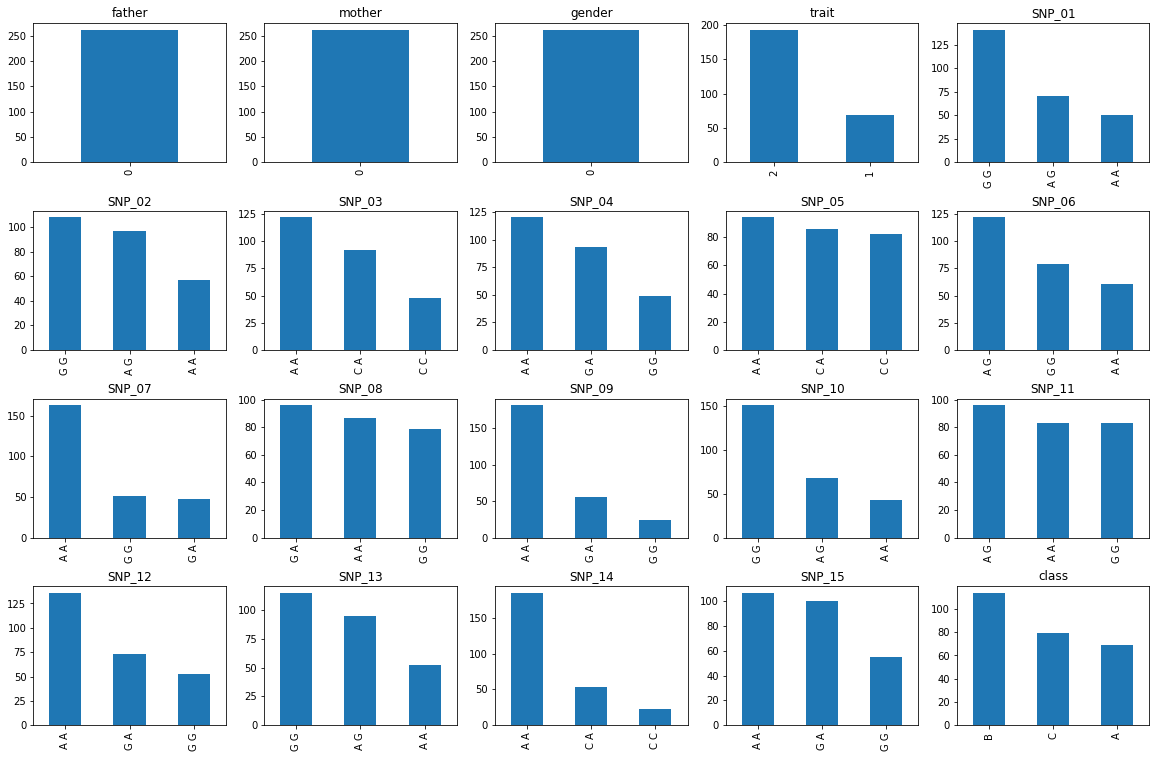

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=5)
i = 1
for j in range(4):
    for k in range(5):
        train.iloc[:, i].value_counts().plot(kind='bar', ax=axes[j, k], figsize=(20, 10), title=train.columns[i])
        i += 1
plt.subplots_adjust(top=1.1, wspace=0.2, hspace=0.35)

- SNP_info 데이터 셋에 대한 EDA

info 데이터셋은 name, chrom, cm, pos열로 구성돼있었으며 각각의 SNP가 여러 개의 염색체로 분포가 돼 있다는 점에 착안해 추후에 SNP를 임의의 그룹으로 묶어 모델링을 진행하였다

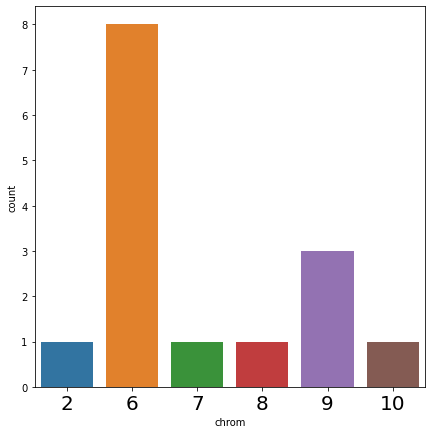

In [11]:
plt.figure(figsize=(7, 7))
sns.countplot(
    data=info,
    x='chrom'
)
plt.xticks(fontsize=20)
plt.show()

# 3. 모델링을 위한 데이터셋 구축

## 3.2 모델 학습을 위한 데이터 구성
info 데이터셋에서 염색체(2, 6, 7, 8, 9, 10)별로 묶어 리스트를 생성하였고 임의의 그룹으로 묶어 모델링을 진행하기 위해 각각 3개, 4개, 전체 그룹으로 구성하였다. 그로 인해 3개로 묶은 그룹 20개, 4개로 묶은 그룹 15개, 전체 그룹 총 36개의 후보군이 정해졌다.

In [12]:
id = info['SNP_id']
chrom_2 = []
chrom_6 = []
chrom_7 = []
chrom_8 = []
chrom_9 = []
chrom_10 = []

for i, j  in enumerate(info['chrom']):
    if j == 2:
        chrom_2.append(id[i])
    elif j == 6:
        chrom_6.append(id[i])
    elif j == 7:
        chrom_7.append(id[i])
    elif j == 8:
        chrom_8.append(id[i])
    elif j == 9:
        chrom_9.append(id[i])
    else:
        chrom_10.append(id[i])
        
chrom = [chrom_2, chrom_6, chrom_7, chrom_8, chrom_9, chrom_10]

# 염색체 3개 그룹씩 묶기
comb_3_chrom = list(combinations(chrom, 3))
# 염색체 4개 그룹씩 묶기
comb_4_chrom = list(combinations(chrom, 4))
# 전체 그룹 리스트로 생성
comb_chrom = comb_3_chrom + comb_4_chrom

In [13]:
# 3개씩 묶은 그룹과 4개씩 묶은 그룹의 개수 출력
print(len(comb_3_chrom), len(comb_4_chrom))

20 15


In [31]:
# snp_group 리스트에 그룹들을 저장
snp_group = []
for i in comb_chrom:
    snp_group.append(list(itertools.chain(*i)))

snp_group[:3]

[['SNP_01',
  'SNP_02',
  'SNP_03',
  'SNP_04',
  'SNP_05',
  'SNP_06',
  'SNP_07',
  'SNP_08',
  'SNP_09',
  'SNP_10'],
 ['SNP_01',
  'SNP_02',
  'SNP_03',
  'SNP_04',
  'SNP_05',
  'SNP_06',
  'SNP_07',
  'SNP_08',
  'SNP_09',
  'SNP_11'],
 ['SNP_01',
  'SNP_02',
  'SNP_03',
  'SNP_04',
  'SNP_05',
  'SNP_06',
  'SNP_07',
  'SNP_08',
  'SNP_09',
  'SNP_12',
  'SNP_13',
  'SNP_14']]

# 4. 예측 모델 구성 및 실험

## 4.1 Xgboost 알고리즘

본격적으로 학습을 시작하기 위해 Xgboost 알고리즘을 활용하였다. 실험은 Window 10 Home, cpu는 AMD Ryzen 7 4700U with Radeon Graphics            2.00 GHz, RAM 16GB 환경에서 진행하였다.

## 4.2 학습 및 성능평가
  


본격적으로 모델링을 하기 위한 함수를 작성하였으며 과정은 이렇다

1. 모델링을 위한 train/test 셋 분리
   모델 성능 검증을 위해 scikit-learn 라이브러리에서 제공하는 train_test_split 모듈을 불러와 데이터를 train, test 셋으로 분리하였으며
   random 함수의 seed 값을 고정하기 위해 random_state를 42로 설정하고 test 셋의 사이즈는 전체 데이터의 20%로 설정하였다.

2. Xgboost 모델 불러오기
   모델링을 위해 xgboost 라이브러리의 XGBClassifier 모듈을 불러왔으며 GridSearchCV의 활용을 위해 미리 파라미터를 설정해주었다. GridSearchCV에 활용되는 Xgboost의 파라미터는 다음과 같다.
   - n_estimators: 트리 모델의 개수
   - learning_rate: 학습률
   - max_depth: 트리의 최대 깊이
   이 외에도 많은 파라미터들이 존재하지만 데이터의 수가 많지 않다는 것을 고려해 파라미터 튜링에 널리 쓰이는 파라미터 3개를 선정하였다.
<p></p>

3. GridsearchCV
  GridSearchCV를 활용해 최적의 파라미터를 선정해주었다. 이 모듈은 미리 설정해놓은 파라미터의 범위 내에서 교차 검증을 통해 최적의 파라미터를 선정해주며 마찬가지로 파라미터 조정을 해줄 수 있다. 파라미터는 다음과 같다.
   - cv: 교차검증의 개수로 5로 설정하였다
   - scoring: 최적의 파라미터를 선정하기 위한 지표로 Macro-F1 score를 선정하였다. Macro-F1 score는 클래스별/레이블별 F1-score의 평균으로 정의되며 0과 1 사이의 값을 가진다
<p></p>

4. 최종적인 테스트 셋 점수 예측 결과
  마지막으로 모델이 예측한 점수와 실제 점수를 비교하여 Macro-F1 score를 도출하고 모델, 모델링에 사용된 SNP 그룹, 모델 점수를 반환하고 함수를 종료한다.

In [15]:
def modeling(group):
    # trait 변수 추가 후 훈련 데이터 셋과 테스트 셋으로 나누는 과정
    group.append('trait')
    x = train_x[group]
    x_train, x_test, y_train, y_test = train_test_split(x, train_y,
    test_size=0.2, random_state=42)
    # Xgboost의 XGBClassifier 모듈을 불러온 후 파라미터 설정 
    xgb= XGBClassifier()
    xgb_param_grid={
    'n_estimators' : [100,200,300,400,500, 600],
    'learning_rate' : [0.01,0.05,0.1],
    'max_depth' : [2, 3, 4, 5]
    }
    # GridSearchCV를 활용해 최적의 파라미터 선정과 최적의 모델 선정
    xgb_grid=GridSearchCV(xgb, param_grid = xgb_param_grid, scoring="f1_macro", cv=5)
    xgb_grid.fit(x_train, y_train)
    model = xgb_grid.best_estimator_
    # 테스트 셋의 예측 점수와 모델, SNP그룹, macro f1 score를 최종 결과물로 반환
    pred = model.predict(x_test)
    model_score = metrics.f1_score(pred, y_test, average='macro')
    return model, group, model_score

### 4.2.1 Case 1. 전체 염색체 이용

그룹으로 묶어 실험을 진행하기 전 모델들의 모델, SNP그룹, 모델 점수를 저장하기 위한 데이터프레임을 생성하였고, 전체 데이터에 대한 모델링을 진행하였다.Macro F1-score는 0.96388를 기록하였으며 학습시간은 57.6초가 소요되었다.

In [16]:
# 데이터를 저장하기 위한 데이터프레임 생성
snp_model = pd.DataFrame({'모델': [], 'SNP그룹': [], '모델점수': []})

In [17]:
# 전체 염색체에 대한 모델링 진행
all_chrom =['SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15']

best_model, group, score = modeling(all_chrom)
print(score)
data_to_insert = pd.DataFrame({'모델': best_model,
                    'SNP그룹': [group],
                    '모델점수': score})
snp_model = pd.concat([snp_model, data_to_insert])

0.9638888888888889


### 4.2.2 Case 2. 그룹으로 묶어 진행 

 전체 염색체에 대한 모델링을 진행 후 본격적으로 임의의 그룹(snp_group)에 대한 실험을 수행하였다. 3개씩 묶은 그룹 20개, 4개씩 묶은 그룹 15개 총 35개에 대한 모델링을 진행하였으며 학습시간은 33분 41초가 소요되었다. 

In [19]:
# 각각의 snp그룹 별로 모델링을 진행하기 위한 for문과 모델, SNP그룹, 점수 데이터프레임에 저장
for i in snp_group:
    best_model, group, score = modeling(i)
    data_to_insert = pd.DataFrame({'모델': best_model,
                      'SNP그룹': [group],
                      '모델점수': score})
    snp_model = pd.concat([snp_model, data_to_insert])

## 4.3 결과 정리 및 분석

모든 후보군에 대한 모델링을 진행 후 최종적으로 모델에 대한 정보를 저장한 snp_model_score 데이터프레임을 분석하였다. 총 36개의 행에 대해서 분석하였으며 모델점수를 기준으로 내림차순으로 분류한 결과, 가장 높은 점수는 0.964674의 정확도를 보이는 모델이었으며 분포를 살펴보면 0.875 ~ 0.964 사이의 정확도를 보임을 볼 수 있다. 

In [20]:
# snp_model 데이터프레임 모델점수 열을 기준으로 내림차순 정렬
snp_model_score = snp_model.sort_values(by='모델점수', ascending=False)
snp_model_score.head()

,모델,SNP그룹,모델점수
0,"XGBClassifier(base_score=0.5, booster='gbtree'...","[SNP_02, SNP_03, SNP_04, SNP_05, SNP_06, SNP_0...",0.964674
0,"XGBClassifier(base_score=0.5, booster='gbtree'...","[SNP_01, SNP_02, SNP_03, SNP_04, SNP_05, SNP_0...",0.963889
0,"XGBClassifier(base_score=0.5, booster='gbtree'...","[SNP_02, SNP_03, SNP_04, SNP_05, SNP_06, SNP_0...",0.963889
0,"XGBClassifier(base_score=0.5, booster='gbtree'...","[SNP_02, SNP_03, SNP_04, SNP_05, SNP_06, SNP_0...",0.963889
0,"XGBClassifier(base_score=0.5, booster='gbtree'...","[SNP_02, SNP_03, SNP_04, SNP_05, SNP_06, SNP_0...",0.963889


In [21]:
# 모델점수 정렬표
round(snp_model_score['모델점수'], 4).value_counts().sort_index()

0.7621    1
0.8143    1
0.8514    2
0.8626    3
0.8719    1
0.8751    1
0.8886    1
0.8917    3
0.8940    2
0.9056    1
0.9085    1
0.9108    3
0.9125    1
0.9136    1
0.9257    1
0.9278    1
0.9293    3
0.9305    1
0.9465    1
0.9475    1
0.9639    5
0.9647    1
Name: 모델점수, dtype: int64

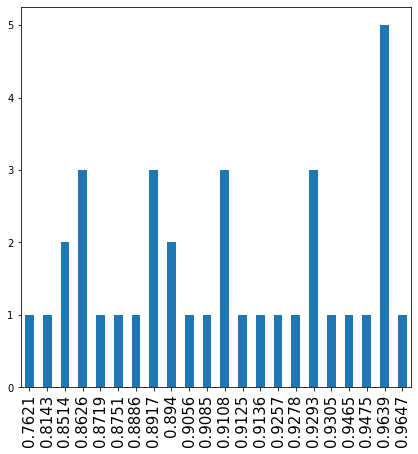

In [22]:
# 위의 표에 대한 막대 그래프
round(snp_model_score['모델점수'], 4).value_counts().sort_index().plot(kind='bar', figsize=(7, 7))
plt.xticks(fontsize=15)
plt.show()

### 4.3.1 최적의 모델 선정

결과적으로 0.964674의 Macro F1-score로 최고의 정확도를 기록한 모델을 최종적으로 선택하였다. 모델의 파라미터로는 n_estimators: 300,learning_rate: 0.05, max_depth: 2를 기록하였음을 볼 수 있으며 SNP그룹으로는 6, 9, 10번 염색체가 선택되었다. 

In [23]:
# 최적의 Xgboost 모델에 대한 파라미터 정보
best_snp_model = snp_model_score.iloc[0, ]['모델']
best_snp_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [24]:
# 최적의 Xgboost 모델에 대한 SNP그룹
snp_best_group = snp_model_score.iloc[0, ]['SNP그룹']

chrom_count = [2, 6, 7, 8, 9, 10]
for j, i in enumerate(chrom):
    if (set(i) & set(snp_best_group)) != set():
        print(f"{chrom_count[j]}번 염색체")

6번 염색체
9번 염색체
10번 염색체


In [25]:
# 최적의 Xgboost 모델에 대한 Macro-F1 score
snp_model_score.iloc[0, ]['모델점수']

0.9646739130434782

### 4.3.2 모델 예측과 결과 도출

도출될 모델을 토대로 테스트 셋에 대한 예측을 진행하였다. 테스트 셋 역시 훈련 셋과 동일하게 Feature Selection을 진행하였으며 Scikit-Learn 라이브러리의 inverse_transform 모듈을 통해 최종 결과값을 도출하였다. 그 결과 0.98116의 Macro-F1 score를 기록하여 준수한 결과를 도출하였다.

In [30]:
test_drop = test_x[snp_best_group]
pred = best_snp_model.predict(test_drop)
sample = pd.read_csv('sample_submission.csv')
sample['class'] = class_le.inverse_transform(pred)
sample.head()

,id,class
0,TEST_000,A
1,TEST_001,B
2,TEST_002,C
3,TEST_003,C
4,TEST_004,A


# 5. 결론



본 연구에서는 SNP의 정보를 토대로 A, B, C 세가지 품종을 분류하기 위한 모델을 연구하였다. 개발 모델은 Xgboost 모델을 사용하였으며 성능의 향상을 위해 GridSearchCv 기법을 활용하였다. 튜닝할 파라미터로는 n_estimators,learning_rate, max_depth를 사용하였으며 총 36개의 염색체 그룹에 대한 실험을 진행하였다. 그 결과 가장 높은 Macro-F1 score(0.964674)를 기록한 모델을 토대로 테스트 데이터의 예측 실험을 진행하였으며 최종적으로는 0.98116의 Macro-F1 score를 기록하였다. 본 연구를 통해 머신러닝에 SNP 품종 분류에 대한 활용 가능성을 살펴볼 수 있었으며 제안된 모델과 기법 또한 추후에 SNP 품종 연구에도 도움이 될 것으로 기대된다.

# 6. 참고문헌
[1] 김형용. 고밀도 SNP 칩 유전자형 데이터 기계학습 기반반려견 품종 식별 유전마커 선발(2019)

[2] 김상곤. SNP마커 개발을 통한 사료용 옥수수 품종판별(2017)

[3] 김승창. 단일염기다형성 마커를 이용한 백우 품종 식별 방법(2020)

[4] Xgboost[웹사이트]. (2020.07.13). URL: https://xgboost.readthedocs.io/en/stable/tutorials/param_tuning.html

[5] 유전체 정보 데이터 [웹사이트]. URL: https://dacon.io/competitions/official/236035/data